In [ ]:
import math

In [54]:
import math
n = 10**15
math.log(n, 2)

49.82892142331043

In [18]:
def prime_factors(num: int):
    factors = []
    while num % 2 == 0:
        factors.append(2)
        num //= 2
    for i in range(3, math.isqrt(num) + 1, 2):
        while num % i == 0:
            factors.append(i)
            num //= i
    if num > 2:
        factors.append(num)
    return factors


In [43]:
pf = prime_factors(16)
pf2 = prime_factors(637)
pf3 = prime_factors(72*637)

In [44]:
pf, pf2, pf3

([2, 2, 2, 2], [7, 7, 13], [2, 2, 2, 3, 3, 7, 7, 13])

In [30]:
4*3*3*2

72

In [42]:
def prime_sieve(upper_bound):
    prime_factorizations = [[] for _ in range(upper_bound + 1)]
    for i in range(2, upper_bound + 1):
        if len(prime_factorizations[i]) > 0: continue # not a prime
        for j in range(i, upper_bound + 1, i):
            prime_factorizations[j].append(i)
    return prime_factorizations
ps = prime_sieve(10**6+3)

In [64]:
for p in range(2, 1_000):
    a = 7
    if p % a == 0: continue
    n = 1
    rem = []
    # if [x, x, ..., 1] then it satisfies fermat's little theorem, p could be prime.
    for _ in range(p - 1):
        n *= a
        rem.append(n % p)
    print(p, rem)

2 [1]
3 [1, 1]
4 [3, 1, 3]
5 [2, 4, 3, 1]
6 [1, 1, 1, 1, 1]
8 [7, 1, 7, 1, 7, 1, 7]
9 [7, 4, 1, 7, 4, 1, 7, 4]
10 [7, 9, 3, 1, 7, 9, 3, 1, 7]
11 [7, 5, 2, 3, 10, 4, 6, 9, 8, 1]
12 [7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7]
13 [7, 10, 5, 9, 11, 12, 6, 3, 8, 4, 2, 1]
15 [7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4]
16 [7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7]
17 [7, 15, 3, 4, 11, 9, 12, 16, 10, 2, 14, 13, 6, 8, 5, 1]
18 [7, 13, 1, 7, 13, 1, 7, 13, 1, 7, 13, 1, 7, 13, 1, 7, 13]
19 [7, 11, 1, 7, 11, 1, 7, 11, 1, 7, 11, 1, 7, 11, 1, 7, 11, 1]
20 [7, 9, 3, 1, 7, 9, 3, 1, 7, 9, 3, 1, 7, 9, 3, 1, 7, 9, 3]
22 [7, 5, 13, 3, 21, 15, 17, 9, 19, 1, 7, 5, 13, 3, 21, 15, 17, 9, 19, 1, 7]
23 [7, 3, 21, 9, 17, 4, 5, 12, 15, 13, 22, 16, 20, 2, 14, 6, 19, 18, 11, 8, 10, 1]
24 [7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7]
25 [7, 24, 18, 1, 7, 24, 18, 1, 7, 24, 18, 1, 7, 24, 18, 1, 7, 24, 18, 1, 7, 24, 18, 1]
26 [7, 23, 5, 9, 11, 25, 19, 3, 21, 17, 15, 1, 7, 23, 5, 9, 11, 25, 19, 3, 21, 

In [63]:
print(rem)

[7, 9, 3, 1, 7, 9, 3, 1, 7]


In [48]:
rem2 = []
cur = 0
for i in range(n//a):
    cur += a
    rem2.append(cur % p)
print(rem2[-1])

1


In [49]:
for i in range(0, n, 1000):
    print(rem2[i])

3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0
4
1
5
2
6
3
0


IndexError: list index out of range

In [19]:
N = 1_000
a = 4
for mod in range(2, N):
    rem = [1]
    vis = set()
    nodes = set([1])
    path = [1]
    while True:
        rem.append((rem[-1] * a) % mod)
        edge = (rem[-2], rem[-1])
        if rem[-1] in nodes: 
            cycle_node = rem[-1]
            break
        if edge in vis: continue
        vis.add(edge)
        nodes.add(rem[-1])
        path.append(rem[-1])
    cnt = 1
    while path[-1] != cycle_node:
        path.pop()
        cnt += 1
    print(mod, cycle_node, (mod - 1) % cnt, cnt)   

2 0 0 1
3 1 0 1
4 0 0 1
5 1 0 2
6 4 0 1
7 1 0 3
8 0 0 1
9 1 2 3
10 4 1 2
11 1 0 5
12 4 0 1
13 1 0 6
14 4 1 3
15 1 0 2
16 0 0 1
17 1 0 4
18 4 2 3
19 1 0 9
20 4 1 2
21 1 2 3
22 4 1 5
23 1 0 11
24 16 0 1
25 1 4 10
26 4 1 6
27 1 8 9
28 4 0 3
29 1 0 14
30 4 1 2
31 1 0 5
32 0 0 1
33 1 2 5
34 4 1 4
35 1 4 6
36 4 2 3
37 1 0 18
38 4 1 9
39 1 2 6
40 16 1 2
41 1 0 10
42 4 2 3
43 1 0 7
44 4 3 5
45 1 2 6
46 4 1 11
47 1 0 23
48 16 0 1
49 1 6 21
50 4 9 10
51 1 2 4
52 4 3 6
53 1 0 26
54 4 8 9
55 1 4 10
56 16 1 3
57 1 2 9
58 4 1 14
59 1 0 29
60 4 1 2
61 1 0 30
62 4 1 5
63 1 2 3
64 0 0 1
65 1 4 6
66 4 0 5
67 1 0 33
68 4 3 4
69 1 2 11
70 4 3 6
71 1 0 35
72 16 2 3
73 1 0 9
74 4 1 18
75 1 4 10
76 4 3 9
77 1 1 15
78 4 5 6
79 1 0 39
80 16 1 2
81 1 26 27
82 4 1 10
83 1 0 41
84 4 2 3
85 1 0 4
86 4 1 7
87 1 2 14
88 16 2 5
89 1 0 11
90 4 5 6
91 1 0 6
92 4 3 11
93 1 2 5
94 4 1 23
95 1 4 18
96 64 0 1
97 1 0 24
98 4 13 21
99 1 8 15
100 4 9 10
101 1 0 50
102 4 1 4
103 1 0 51
104 16 1 6
105 1 2 6
106 4 1 26
107 1 0 5

In [1]:
s = "prepareintelligentopinion"
queries = [(1,7),(8,18),(19,25),(12,13)]
for l, r in queries:
    print(s[l-1:r])

prepare
intelligent
opinion
ll


In [ ]:
"""
prefix sum to track the frequency of each character


To be almost perfectly balanced, you need exactly one character that has an odd frequency in the query range.
If it passes that check then it is almost perfecty balanced.
But one more check is needed which is that the frequency of the characters should be equal when you look at the first and the second half of the query range.


left = 8
right = 12
length = 5

delete character at these locations 
(8, 10), (11, 12)
(8, 9), (10, 12)

check character frequencies are the same, and only one differs

0,1,2,3,4,5,6,7,8,9,10,11,12,13
  0,1,2,3,4,5,6,7,8

7, 8, 9, 10, 11
l     m      r
10 - 7
7,8,9
12 - 10
10,11

9 - 7
7, 8
12 - 9
9, 10, 11





"""



In [ ]:
"""

xor doesn't work
prefix sum for each distinct character doesn't work


101
010

100
011

"""

In [2]:
arr = [7, 17, 17]
sum(arr)

41

In [4]:
math.prod(arr)

2023

In [5]:
print(len(bin(10**9)[2:]))

30


In [9]:
N = 1_000_000_006
M = 1_000_000_007
for i in range(1_000_000_000, N + 1):
    print(i, (i * N) % M)

1000000000 7
1000000001 6
1000000002 5
1000000003 4
1000000004 3
1000000005 2
1000000006 1


In [10]:
for i in range(1, 100):
    print(i, (i * N) % M)

1 1000000006
2 1000000005
3 1000000004
4 1000000003
5 1000000002
6 1000000001
7 1000000000
8 999999999
9 999999998
10 999999997
11 999999996
12 999999995
13 999999994
14 999999993
15 999999992
16 999999991
17 999999990
18 999999989
19 999999988
20 999999987
21 999999986
22 999999985
23 999999984
24 999999983
25 999999982
26 999999981
27 999999980
28 999999979
29 999999978
30 999999977
31 999999976
32 999999975
33 999999974
34 999999973
35 999999972
36 999999971
37 999999970
38 999999969
39 999999968
40 999999967
41 999999966
42 999999965
43 999999964
44 999999963
45 999999962
46 999999961
47 999999960
48 999999959
49 999999958
50 999999957
51 999999956
52 999999955
53 999999954
54 999999953
55 999999952
56 999999951
57 999999950
58 999999949
59 999999948
60 999999947
61 999999946
62 999999945
63 999999944
64 999999943
65 999999942
66 999999941
67 999999940
68 999999939
69 999999938
70 999999937
71 999999936
72 999999935
73 999999934
74 999999933
75 999999932
76 999999931
77 999999930
7

In [ ]:
primes = [2,3,5,7,11,13,17,19,23,29,31,37,41]
"""
what set of prime integers equal sum 41
infinite knapsack problem where let's say you have infinite number of each prime integer.

So how many ways can you get 41, but also need to actually save that path
"""
n = len(primes)
res = []
path = []
sum_ = 0
def backtrack(i):
    global sum_
    if sum_ == 41:
        res.append(path.copy())
        return
    if i == n or sum_ > 41: return
    # take 0
    backtrack(i + 1)
    cur = 0
    # all options
    for _ in range(41 // primes[i]):
        cur += primes[i]
        path.append(cur)
        sum_ += primes[i]
        backtrack(i + 1)
        path.pop()
    sum_ -= cur

In [62]:
primes = [1,2,3,5,7,11,13,17,19,23,29,31,37,41]
"""
what set of prime integers equal sum 41
infinite knapsack problem where let's say you have infinite number of each prime integer.

So how many ways can you get 41, but also need to actually save that path
"""
n = len(primes)
res = []
path = []
sum_ = 0
def backtrack(i):
    global sum_
    if sum_ == 41:
        res.append(path.copy())
        return
    if i == n or sum_ > 41: return
    # take 0
    backtrack(i + 1)
    cur = 1
    # all options
    for _ in range(41 // primes[i]):
        cur *= primes[i]
        for _ in range(41 // cur):
            path.append(cur)
            sum_ += cur
            backtrack(i + 1)
        for _ in range(41 // cur):
            path.pop()
            sum_ -= cur


In [63]:
backtrack(0)

In [64]:
res

[[41],
 [11, 13, 17],
 [11, 11, 19],
 [7, 17, 17],
 [7, 11, 23],
 [7, 7, 7, 7, 13],
 [5, 17, 19],
 [5, 13, 23],
 [5, 7, 29],
 [5, 7, 7, 11, 11],
 [5, 5, 31],
 [5, 5, 7, 11, 13],
 [5, 5, 7, 7, 17],
 [5, 5, 5, 13, 13],
 [5, 5, 5, 7, 19],
 [5, 5, 5, 5, 7, 7, 7],
 [5, 5, 5, 5, 5, 5, 11],
 [3, 19, 19],
 [3, 7, 31],
 [3, 7, 7, 11, 13],
 [3, 7, 7, 7, 17],
 [3, 5, 11, 11, 11],
 [3, 5, 7, 13, 13],
 [3, 5, 7, 7, 19],
 [3, 5, 5, 11, 17],
 [3, 5, 5, 7, 7, 7, 7],
 [3, 5, 5, 5, 23],
 [3, 5, 5, 5, 5, 7, 11],
 [3, 5, 5, 5, 5, 5, 13],
 [3, 25, 13],
 [3, 3, 11, 11, 13],
 [3, 3, 7, 11, 17],
 [3, 3, 7, 7, 7, 7, 7],
 [3, 3, 5, 13, 17],
 [3, 3, 5, 11, 19],
 [3, 3, 5, 7, 23],
 [3, 3, 5, 5, 7, 7, 11],
 [3, 3, 5, 5, 5, 7, 13],
 [3, 3, 5, 5, 5, 5, 5, 5, 5],
 [3, 3, 3, 13, 19],
 [3, 3, 3, 7, 7, 7, 11],
 [3, 3, 3, 5, 7, 7, 13],
 [3, 3, 3, 5, 5, 11, 11],
 [3, 3, 3, 5, 5, 5, 17],
 [3, 3, 3, 5, 5, 5, 5, 5, 7],
 [3, 3, 3, 25, 7],
 [3, 3, 3, 3, 29],
 [3, 3, 3, 3, 7, 11, 11],
 [3, 3, 3, 3, 5, 11, 13],
 [3, 3, 3, 3, 5, 

In [65]:
len(res)

197056

In [66]:
2**14

16384

In [74]:
result = []
from itertools import product
for i, j, k in product(range(1, 42), repeat = 3):
    if i + j + k == 41:
        result.append((i, j, k))


In [75]:
len(result)

780

In [70]:
result

[(1, 1, 1, 38),
 (1, 1, 2, 37),
 (1, 1, 3, 36),
 (1, 1, 4, 35),
 (1, 1, 5, 34),
 (1, 1, 6, 33),
 (1, 1, 7, 32),
 (1, 1, 8, 31),
 (1, 1, 9, 30),
 (1, 1, 10, 29),
 (1, 1, 11, 28),
 (1, 1, 12, 27),
 (1, 1, 13, 26),
 (1, 1, 14, 25),
 (1, 1, 15, 24),
 (1, 1, 16, 23),
 (1, 1, 17, 22),
 (1, 1, 18, 21),
 (1, 1, 19, 20),
 (1, 1, 20, 19),
 (1, 1, 21, 18),
 (1, 1, 22, 17),
 (1, 1, 23, 16),
 (1, 1, 24, 15),
 (1, 1, 25, 14),
 (1, 1, 26, 13),
 (1, 1, 27, 12),
 (1, 1, 28, 11),
 (1, 1, 29, 10),
 (1, 1, 30, 9),
 (1, 1, 31, 8),
 (1, 1, 32, 7),
 (1, 1, 33, 6),
 (1, 1, 34, 5),
 (1, 1, 35, 4),
 (1, 1, 36, 3),
 (1, 1, 37, 2),
 (1, 1, 38, 1),
 (1, 2, 1, 37),
 (1, 2, 2, 36),
 (1, 2, 3, 35),
 (1, 2, 4, 34),
 (1, 2, 5, 33),
 (1, 2, 6, 32),
 (1, 2, 7, 31),
 (1, 2, 8, 30),
 (1, 2, 9, 29),
 (1, 2, 10, 28),
 (1, 2, 11, 27),
 (1, 2, 12, 26),
 (1, 2, 13, 25),
 (1, 2, 14, 24),
 (1, 2, 15, 23),
 (1, 2, 16, 22),
 (1, 2, 17, 21),
 (1, 2, 18, 20),
 (1, 2, 19, 19),
 (1, 2, 20, 18),
 (1, 2, 21, 17),
 (1, 2, 22, 16),
 (1, 2,

In [76]:
2*5

10

In [77]:
3*5

15

In [78]:
38/2

19.0

In [79]:
19+2

21

In [102]:
from collections import Counter
arr = {1:1}
for i in range(28):
    narr = Counter()
    for k, v in arr.items():
        narr[k + 1] += v
        narr[k] += k * v
    arr = narr
print(arr)
print(sum(arr.values()))

Counter({11: 18059551225961878690915, 10: 16392038075086211019625, 12: 13326679652926121224470, 9: 9452962848327254398506, 13: 6855064482242755179765, 8: 3224318613979279184316, 14: 2534474684137526739000, 15: 689692892575539953400, 7: 588469772213874823272, 16: 140694950355081071520, 6: 49628317055962639176, 17: 21818248085373723570, 18: 2598531274376323650, 5: 1540200411172850701, 19: 239332331869053150, 20: 17110181160972900, 4: 11998160744311570, 21: 949910385013590, 22: 40823077538100, 3: 11438127792025, 23: 1347860993700, 24: 33738295500, 25: 626551380, 2: 268435455, 26: 8336601, 27: 74907, 28: 406, 29: 1, 1: 1})
71339801938860275191172


In [104]:
arr = [2,2,5,5,7,7]
41 - sum(arr)

13

In [105]:
arr = [14,14,5,5]
sum(arr)

38

In [106]:
41 - sum(ar)

NameError: name 'ar' is not defined

In [107]:
arr = [2,2,3,3,5,5]
sum(arr)

20

In [197]:
"""
Cookie simulation
"""
from collections import Counter, defaultdict
from itertools import combinations, permutations
C_1, C_equal, C_less, C_greater = {1,2,3}, {4,5}, {6, 7, 8}, {9, 10}
total = len(C_1) + len(C_equal) + len(C_less) + len(C_greater)
K = 2
elements = list(range(1, 9))
combs = list(filter(lambda arr: not all(x in C_less for x in arr), combinations(elements, K + 1)))
perms = list(filter(lambda arr: not all(x in C_less for x in arr), permutations(elements, K + 1)))

In [198]:
len(perms), len(combs)

(330, 55)

In [166]:
result = []
for arr in perms:
    left, right = None, None
    for v in arr:
        if left is None:
            left = v
        elif right is None:
            right = v
        if left and right:
            if left in C_less and right in C_less:
                if left < right:
                    left = None
                else:
                    right = None
            elif left in C_less:
                left = None
            elif right in C_less:
                right = None
            else:
                left = None
    result.append(left or right)

In [170]:
result_with_batch_one = [r for r in result if r in C_1]
result_with_equal = [r for r in result if r in C_equal]
result_with_less = [r for r in result if r in C_less]

In [202]:
counts = Counter(result_with_batch_one)
print(counts)
counts = Counter(result_with_equal)
print(counts)

Counter({2: 66, 3: 66, 1: 66})
Counter({4: 66, 5: 66})


In [5]:
N, M = 2, 4
W1, Aw, Bw = 1, 1, 0
D1, Ad, Bd = 0, 1, 1
S1, As, Bs = 1, 1, 1
# N, M = 10, 30
# W1, Aw, Bw = 5, 5, 5
# D1, Ad, Bd = 0 ,1, 1
# S1, As, Bs = 1, 1, 1
wands = [None] * M
D = [None] * M
Z = [None] * M
S = [None] * M
wands[0] = W1
D[0] = D1
S[0] = S1
for i in range(1, M):
    wands[i] = ((Aw * wands[i - 1] + Bw) % N) + 1
    D[i] = (Ad * D[i - 1] + Bd) % 3
    S[i] = ((As * S[i - 1] + Bs) % 1_000_000_000) + 1
for i in range(M):
    Z[i] = max(1, min(N, wands[i] + D[i] - 1))


In [6]:
print("wands", wands, "S", S, "Z", Z)

wands [1, 2, 1, 2] S [1, 3, 5, 7] Z [1, 2, 2, 1]


In [ ]:
"""
0th visit
you can target zombie 1 with wand 1 and zombie 2 with wand 2
1 way

1st visit
learn 1 spell for wand 1 to target zombie 1
wand 1 (2, 1)
wand 2 (1, 1)
2 ways

2nd visit
learn 3 spells for wand 2 to target zombie 2
wand 1 (2, 1)
wand 2 (4, 2)
8 ways

3rd visit
learn 5 spells for wand 1 to target zombie 2
wand 1 (2, 1), (5, 2)
wand 2 (4, 2)
8 ways

4th visit
learn 7 spells for wand 2 to target zombie 1
wand 1 (2, 1), (5, 2)
wand 2 (7, 1), (4, 2)
43 ways


Example when you have some state after M visits and there are 6 zombies and wands, 
a method to calculate the number of ways

C[i,j] number of different spells for ith wand to target zombie j


zombie 1: dp[1] = dp[0], dp[2] = dp[0]
zombie 2: dp[1] = dp[2], dp[2] = dp[1], dp[3] = dp[1]
zombie 3: dp[2] = dp[3], dp[3] = dp[1] + dp[2], dp[4] = dp[1] + dp[2]
zombie 4: dp[3] = C[4,3] * dp[4], dp[4] = C[4, 4] * (dp[2] + dp[3]), dp[5] = C[4, 5] * (dp[2] + dp[3])
...

another approach

initialize dp[0] = 1
wands 0...1, zombies 0...1: dp[1] = C[1,1] * dp[0]
wands 0...2, zombies 0...2: dp[2] = C[2,2] * dp[1] + C[1,2] * C[2,1] * dp[0]
wands 0...3, zombies 0...3: dp[3] = C[3,3] * dp[2] + C[2,3] * C[3,2] * dp[1]
Thus recurrence relation is 
dp[i] = C[i,i] * dp[i - 1] + C[i - 1, i] * C[i, i - 1] * dp[i - 2]
dp[i] = C1[i] * dp[i - 1] + C2[i - 1] * C3[i - 1] * dp[i - 2]
If you want to define 
C[i,j] = number of spells for ith wand and jth zombie
C1[i] = number of spells for ith wand and ith zombie
C2[i] = number of spells for the ith wand and (i+1)th zombie
C3[i] = number of spells for the (i+1)th wand and ith zombie

initialize
C1[0] = 1
C2[0] = 0
C3[0] = 0

if wand = zombie
C1[i] += s
suppose you have an update and it is like 
add 5 spells to wand 2 to target zombie 3 wand < zombie
Then you'd want to update the C2[2] += 5
Or 5 spells to wand 2 to target zombie 1 wand > zombie
C3[1] += 5

If you increment these coefficients you have to recompute all the dp values right? Which takes O(N) time.
you can't use matrix exponentiation because of these coefficients and how they are varying for each ith index.
There is no transition matrix for the transition states



But can also do this if it is better format
C1[i] = number of spells for ith wand and ith zombie
C2[i] = number of spells for ith wand and (i+1)th zombie
C3[i] = number of spells for (i+1)th wand and ith zombie

wand 1 target zombie 2 multiplied by the ways to match up wand 0 with zombies 0
wand 2 target zombie 1 multiplied by the ways to match up wand 1 to target zombie 2 and wands 0 with zombies 0

wand 2 to target zombie 3 * ways to match up wand 0...1 with zombies 0...1
But you need to use wand 3 to target zombie 2 then for this to match up 0...3 wands with 0...3 zombies

zombie i - 1: dp[i - 2] = C[i - 1, i - 2] * dp[i - 1]
dp[i - 1] = C[i - 1, i - 1] * (dp[i - 3] + dp[i - 2]),
dp[i] = C[i - 1, i] * (dp[i - 3] + dp[i - 2])
zombie i: dp[i - 1] = C[i, i - 1] * dp[i], 
dp[i] = C[i, i] * (dp[i - 2] + dp[i - 1]), 
dp[i + 1] = C[i, i + 1] * (dp[i - 2] + dp[i - 1])

C[i, i - 1]


dp[i] = C[i - 1, i] * (dp[i - 2] + dp[i - 3]) + C[i, i] * (dp[i - 1] + dp[i - 2])




dp[i] = 

For ith zombie you can calculate dp states like this. 

Or you could do 
C1[i] = number of spells for ith wand and ith zombie
C2[i] = number of spells for ith wand and (i+1)th zombie
C3[i] = number of spells for (i+1)th wand and ith zombie

dp[i] = number of ways to match up wands 1...i with zombies 1...i

O(N) time to update dp states basically
So O(NM) time complexity


Take an update such as wand i to target zombie i + 1 


These are different because it means you used wand 1 or wand 2 to target the 1 and 2 zombie
But you can do it like this, 

Then you can target 2,3,4 zombie with wand 3, You can use wand 3 with both of these and 4

"""

In [ ]:
"""
N = 2, K = 1, p = 0.5
 
flip 2 coins, what's the probability of one head
0.5*0.5 + 0.5*0.5 = 0.5
flip 2 coins what's the probability of two heads
0.5*0.5 = 0.25

flip 2 coins the probability of at least one being head is 0.75
flip 1 coins the probability of at least one being head is 0.5

N = 10, K = 5, p  = 0.9, tails is 0.1
flip 10 coins, what's the probability of at least 5 heads
(10 5)*0.9^5*0.1^5 + (10 6)*0.9^6*0.1^4 + (10 7)*0.9^7*0.1^3 + (10 8)*0.9^8*0.1^2 + (10 9)*0.9^9*0.1^1 + (10 10)*0.9^10*0.1^0
P(X>=5) = P(X=5)+P(X=6)+P(X=7)+P(X=8)+P(X=9)+P(X=10)

flip 9 coins at least 5 heads and flip 1 coin at least 5 heads
P(X>=5) = P(X=5)+P(X=6)+P(X=7)+P(X=8)+P(X=9)

flip 5 coins at least 5 heads and flip 5 coins at least 5 heads
P(X>=5) = P(X=5) 

expectation value for indicator variable is just summation of the probabilities
value is just 1 for success, in this case success is winning a prize, and it is 0 for a failure to win a prize, so that doesn't add anything so it is just the sum of probabilies

N = 3000, K = 50, p = 0.123
flip 3000 coins, what's the probability of at least 50 heads
P(X>=50) = P(X=50)+P(X=51)+...+P(X=3000)
flip 2950 coins and flip 50 coins what's the probability
P(X>=50) = P(X=50)+P(X=51)+...+P(X=2950) + P(X=50)
flip 2949 coins and flip 51 coins
P(X=50)+P(X=51)+...+P(X=2949) + P(X=50) + P(X=51)
flip 2900 coins and flip 100 coins or flip 2900 coins and flip 50 coins and flip 50 coins
max(P(X=50)+P(X=51)+...+P(X=2900) + P(X=50) + P(X=51) + P(X=52) + ... + P(X=100), P(X=50)+P(X=51)+...+P(X=2900) + P(X=50) + P(X=50))

x1+x2+x3+...+xn = N
P(x1, X>=K) + P(x2, X>=K) + P(x3, X>=K) + ... + P(xn, X>=K)

so you just need to calculate all the ways to split N into 
1 part, 2 parts, 3 parts, 4 parts and so on


do this N // K times




prefix sum precomputed, in order to get range over sums in O(1) time for instance get sum from L = 50 to R = 2900
wait the binomial coefficient is going to be changing, cause you are changing the number of trials but holding the number of successes constant


for each n from K to N
you can can precalculate the probablity for each n trials and m successes
O(n^2) time complexity

P(n, X>=K) = P(n, K) + P(n, K + 1) + ... + P(n, n)





probability of getting k successes or heads
n is number of trials
P(X = k) 

"""

In [1]:
3_000/50

60.0

In [92]:
N, K = 3_000, 50
def factorials(n):
    fact, inv_fact = [1] * (n + 1), [1] * (n + 1)
    for i in range(2, n + 1):
        fact[i] = (fact[i - 1] * i)
        inv_fact[i] = 1 / fact[i]
    return fact, inv_fact

fact, inv_fact = factorials(51)

def nCr(n, r):
    if n == r: return 1
    # print(fact[n], inv_fact[n - r], inv_fact[r])
    return fact[n] * inv_fact[r] * inv_fact[n - r] if n > r else 0

def pmf_binomial_distribution(n, m, p):
    # print(nCr(n, m), pow(p, m), pow(1 - p, n - m))
    return nCr(n, m) * pow(p, m) * pow(1 - p, n - m)


In [94]:
r = pmf_binomial_distribution(10, 5, 0.1)
print(r)
res = 0
for i in range(5, 11):
    res += pmf_binomial_distribution(10, i, 0.1)
print(res)

0.0014880348000000005
0.0016349374000000007


In [58]:
print(fact[5], inv_fact[5])

120 0.008333333333333333


In [59]:
2*r

0.002976069600000001

In [75]:
import math
print(math.factorial(10)/(math.factorial(5)*math.factorial(5)))

252.0


In [78]:
# fact[10] / (fact[5] * fact[5])
(9*2*7*2) 

252

In [83]:
"""
N ladders 

base at Xi and height Hi

snake of length L can suspend itselb betwen tops of two ladders and and b
ladders are L length apart
ladders are of equal height
no taller ladders between them. 

create all subsets of equal height that will have them between


The solution involves

x1^2 + (x1+x2)^2 + x2^2 + (x1+x2+x3)^2 + (x2+x3)^2 + x3^2 + (x1+x2+x3+x4)^2 + (x2+x3+x4)^2 + (x3+x4)^2 + x4^2 + (x1+x2+x3+x4+x5)^2 + (x2+x3+x4+x5)^2 + (x3+x4+x5)^2 + (x4+x5)^2 + x5^2
5x1^2 + 8x1x2 + 6x1x3 + 4x1x4 + 2x1x5 + 8x2^2 + 12x2x3 + 8x2x4 + 4x2x5 + 9x3^2 + 12x3x4 + 6x3x5 + 8x4^2 + 8x4x5 + 5x5^2

5x1^2 + 8x2^2 + 9x3^2 + 8x4^2 + 5x5^2

"""

1400

In [ ]:
"""
orthogonally continuous
group

maximum number of white stones you can capture.

you have 9 million positions now
"""

In [4]:
3000*3000

9000000

In [20]:
"""
A = 3 3 2 3 5 6
B = 4 4 6 5 3 2

A = 3 2 3 5 6 4
B = 4 6 5 3 2 3

"""
A = [3, 3, 2, 3, 5, 6]
B = [4, 4, 6, 5, 3, 2]
A = [4, 3, 2, 3, 5, 6]
B = [3, 4, 6, 5, 3, 2]
A = [1, 1]
B = [1, 1]
A = [2, 2, 2, 2]
B = [1, 1, 1, 1]
A = [3, 3, 3, 3, 3]
B = [1, 1, 1, 1, 1]
A = [3, 3, 3, 3, 3]
B = [1, 1, 1, 1, 3]
A = [1, 1, 1, 1, 3]
B = [3, 3, 3, 3, 3]
A = [1, 2, 3, 4, 5, 6]
B = [7, 8, 9, 10, 11, 12]
N = len(A)
def is_good (A, B):
    N = len(A)
    for i in range(N):
        if i < N // 2 and A[i] >= B[i]: return False
        if i >= N // 2:
            if N % 2 == 0 and B[i] >= A[i]: return False
            elif (N & 1) and i > N // 2 and B[i] >= A[i]: return False
        if A[i] != B[N - i - 1]: return False
    return True

g = is_good(A, B)
print(A, B, "initial: ", g)
for t in range(1, 2 * N + 1):
    B.append(A.pop(0))
    A.append(B.pop(0))
    print(t, A, B, is_good(A, B))


[1, 2, 3, 4, 5, 6] [7, 8, 9, 10, 11, 12] initial:  False
1 [2, 3, 4, 5, 6, 7] [8, 9, 10, 11, 12, 1] False
2 [3, 4, 5, 6, 7, 8] [9, 10, 11, 12, 1, 2] False
3 [4, 5, 6, 7, 8, 9] [10, 11, 12, 1, 2, 3] False
4 [5, 6, 7, 8, 9, 10] [11, 12, 1, 2, 3, 4] False
5 [6, 7, 8, 9, 10, 11] [12, 1, 2, 3, 4, 5] False
6 [7, 8, 9, 10, 11, 12] [1, 2, 3, 4, 5, 6] False
7 [8, 9, 10, 11, 12, 1] [2, 3, 4, 5, 6, 7] False
8 [9, 10, 11, 12, 1, 2] [3, 4, 5, 6, 7, 8] False
9 [10, 11, 12, 1, 2, 3] [4, 5, 6, 7, 8, 9] False
10 [11, 12, 1, 2, 3, 4] [5, 6, 7, 8, 9, 10] False
11 [12, 1, 2, 3, 4, 5] [6, 7, 8, 9, 10, 11] False
12 [1, 2, 3, 4, 5, 6] [7, 8, 9, 10, 11, 12] False


In [7]:
"""
how to split the array

binary search the values
try if it works

100
150

you can split an integer into values x, x + 1, x + 2
how to check?

x x + 1

"""
33/7

4.714285714285714

In [6]:
33 % 7

5

In [ ]:
7 7 7 7
8 7 7 7

In [47]:
150 // 21

7

In [48]:
21 * 8

168

In [85]:
150 % 16
15 - 6
10 goups of 15

9

In [ ]:
1 + 1 + 1
2 + 2 + 2 + 1
3 + 3 + 3
4 + 4 + 4

In [92]:
n = 100_000
for i in range(1, n // 2):
    print(i * (n // i))

100000
100000
99999
100000
100000
99996
99995
100000
99999
100000
99990
99996
99996
99988
99990
100000
99994
99990
99997
100000
99981
99990
99981
99984
100000
99996
99981
99988
99992
99990
99975
100000
99990
99994
99995
99972
99974
99978
99996
100000
99999
99960
99975
99968
99990
99958
99969
99984
99960
100000
99960
99996
99958
99954
99990
99960
99978
99992
99946
99960
99979
99944
99981
99968
99970
99990
99964
99960
99981
99960
99968
99936
99937
99974
99975
99940
99946
99996
99935
100000
99954
99958
99932
99960
99960
99932
99963
99968
99947
99990
99918
99912
99975
99922
99940
99936
99910
99960
99990
100000
99990
99960
99910
99944
99960
99958
99938
99900
99953
99990
99900
99904
99892
99978
99935
99992
99918
99946
99960
99960
99946
99918
99999
99944
100000
99918
99949
99968
99975
99970
99953
99924
99883
99964
99900
99960
99873
99912
99941
99960
99969
99968
99957
99936
99905
99864
99960
99900
99979
99900
99962
99864
99909
99946
99975
99996
99852
99856
99852
100000
99981
99954
99919
99876


In [87]:
n = 33
for i in range(2, 33):
    num_groups = n // (i + 1)
    rem = n % (i + 1)
    # i - rem <= num_groups + 1
    print(i, rem, i - rem, num_groups)

2 0 2 11
3 1 2 8
4 3 1 6
5 3 2 5
6 5 1 4
7 1 6 4
8 6 2 3
9 3 6 3
10 0 10 3
11 9 2 2
12 7 5 2
13 5 8 2
14 3 11 2
15 1 14 2
16 16 0 1
17 15 2 1
18 14 4 1
19 13 6 1
20 12 8 1
21 11 10 1
22 10 12 1
23 9 14 1
24 8 16 1
25 7 18 1
26 6 20 1
27 5 22 1
28 4 24 1
29 3 26 1
30 2 28 1
31 1 30 1
32 0 32 1


In [ ]:
"""
how to increase by 3
swap one for 20 can decrease by 1,

you can decrease by value of 16 at most, because you have 8 of these

144 - 160
so you can achieve 150 in there somehow

value // x + 2 increase by 1, unless it divides it evenly
m = value // (x + 2) + 1
m * x
if m * x <= target <= m * (x + 2)


20 works
21 doesn't work

start with the samllest, cause that is the max value you can do
and then 
x - 1 -> x -> x + 1


maximize this x value


try then decrease and so on.  Seems like a bad idea

for each count, I find the max value that works 
and take the min of those maxes for each segment





"""

In [40]:
import random
def game(N, values):
    x = -1
    res = 0
    while True:
        y = random.randint(0, N - 1)
        if y <= x: break
        x = y
        res += values[y]
    return res

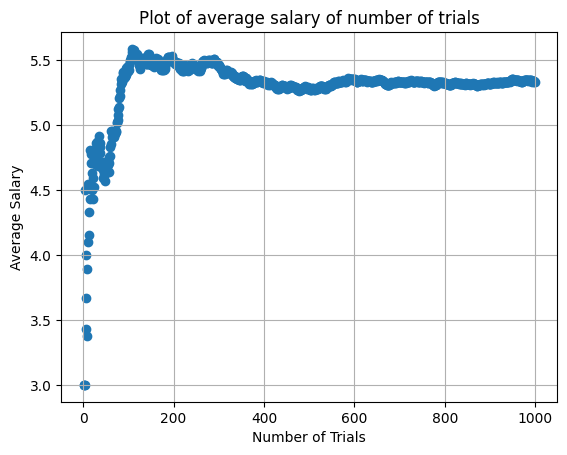

In [43]:
import matplotlib.pyplot as plt
total = 0
N = 1_000
avg_salary = []
salary = []
for i in range(1, N):
    g = game(3, [3, 2, 6])
    total += g
    avg_salary.append(total / i)
    salary.append(g)
plt.scatter(range(1, N), avg_salary)
plt.grid(True)
plt.xlabel('Number of Trials')
plt.ylabel('Average Salary')
plt.title('Plot of average salary of number of trials')
plt.show()

In [34]:
from collections import Counter
sum_ = sum(Counter(salary).values())
Counter(salary)

Counter({6: 3459, 2: 2138, 8: 1117, 3: 1108, 9: 1099, 5: 701, 11: 377})

In [36]:
for k, v in Counter(salary).items():
    print("k", k, "v", v, "p", v / sum_)

k 2 v 2138 p 0.21382138213821383
k 5 v 701 p 0.0701070107010701
k 3 v 1108 p 0.11081108110811082
k 8 v 1117 p 0.11171117111711171
k 6 v 3459 p 0.3459345934593459
k 11 v 377 p 0.037703770377037704
k 9 v 1099 p 0.10991099109910991


In [47]:
print(f"{60**5:,}")

777,600,000


In [46]:
5*4*3

60

In [51]:
import math
math.comb(4, 0)

1

In [58]:
r = sum(math.comb(7, x) for x in range(1, 8))
r

127

In [55]:
2**6

64

In [59]:
n = 10_000
math.log(n, 2)

13.28771237954945

In [60]:
for _ in range(14):
    n //= 2
    print(n)

5000
2500
1250
625
312
156
78
39
19
9
4
2
1
0
